<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/Cosmetics_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df= pd.read_csv("/content/cosmetics_sales_data.csv")

In [39]:
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   374 non-null    object 
 1   Country        374 non-null    object 
 2   Product        374 non-null    object 
 3   Date           374 non-null    object 
 4   Amount ($)     374 non-null    float64
 5   Boxes Shipped  374 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 17.7+ KB


In [41]:
from datetime import datetime

In [42]:
df["Date"]= pd.to_datetime(df["Date"])

In [43]:
df["Month"]=df["Date"].dt.month

In [44]:
df["Year"]=df["Date"].dt.year

In [45]:
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped,Month,Year
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358,4,2022
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449,1,2022
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264,8,2022
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144,8,2022
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484,5,2022


In [46]:
df["day"]=df["Date"].dt.day

In [47]:
sns.set_style("whitegrid")

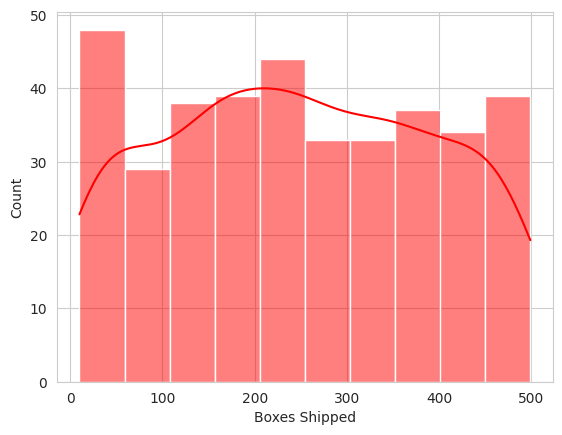

In [48]:
sns.histplot(data=df, x="Boxes Shipped",kde= True, color="red")
plt.show()

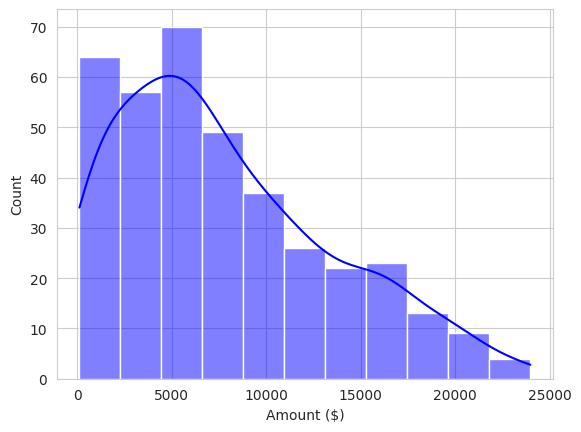

In [49]:
sns.histplot(data=df, x="Amount ($)", kde=True, color="blue")
plt.show()

In [50]:
Country_amount= df.groupby("Country")["Amount ($)"].sum()

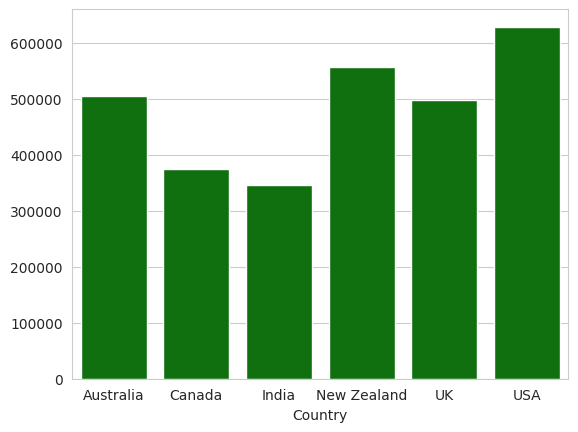

In [51]:
sns.barplot(x=Country_amount.index, y=Country_amount.values, color="green")
plt.show()

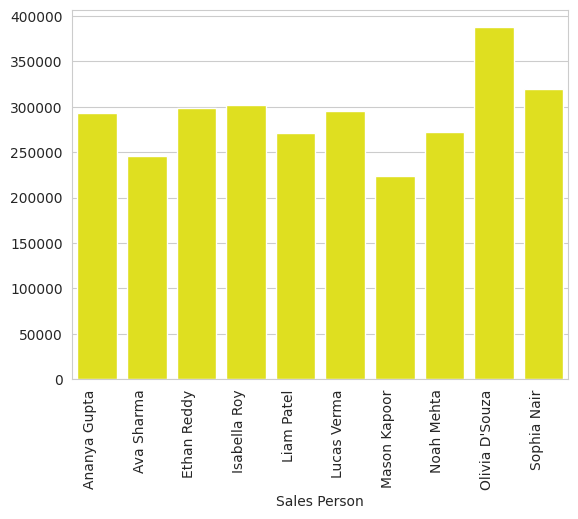

In [52]:
Sales_person_amount= df.groupby("Sales Person")["Amount ($)"].sum()
sns.barplot(x= Sales_person_amount.index, y= Sales_person_amount.values, color="yellow")
plt.xticks(rotation=90, ha="right")
plt.show()

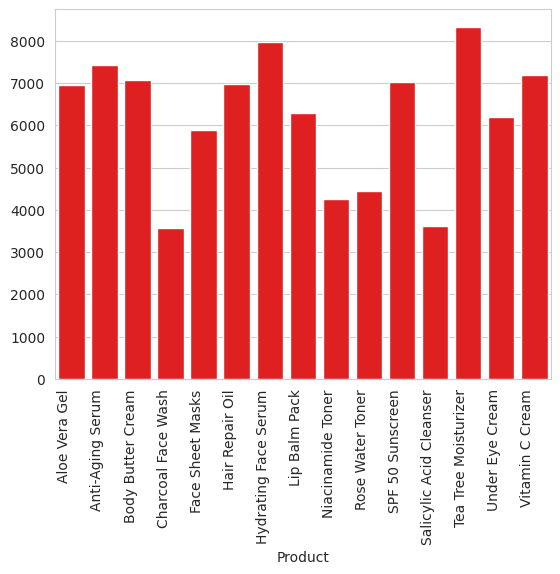

In [53]:
product_boxes= df.groupby("Product")["Boxes Shipped"].sum()
sns.barplot(x= product_boxes.index, y= product_boxes.values, color="red")
plt.xticks(rotation=90, ha="right")
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier


In [55]:
le= LabelEncoder()

In [56]:
columns=["Sales Person","Country", "Product"]

In [57]:
for col in columns:
  df[col]=le.fit_transform(df[col])

In [58]:
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped,Month,Year,day
0,5,1,0,2022-04-30,7897.13,358,4,2022,30
1,2,4,0,2022-01-25,16376.88,449,1,2022,25
2,0,2,2,2022-08-22,5599.68,264,8,2022,22
3,0,3,11,2022-08-26,2966.47,144,8,2022,26
4,9,4,2,2022-05-19,6828.68,484,5,2022,19


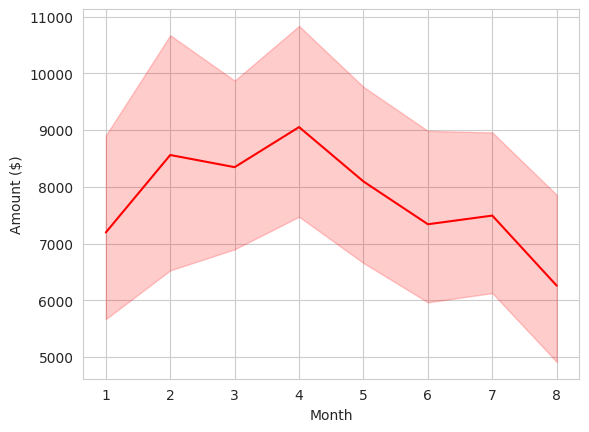

In [59]:
sns.lineplot(data=df, x="Month", y="Amount ($)", color="red")
plt.show()

In [60]:
X= df.drop(["Date", "Boxes Shipped"], axis=1)


In [61]:
y=df["Boxes Shipped"]

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)

In [65]:
residuals= y_test-y_pred_lr

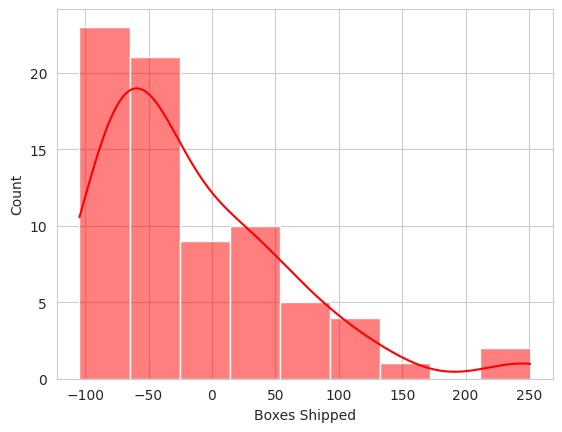

In [67]:
sns.histplot(residuals, kde= True, color="red")
plt.show()

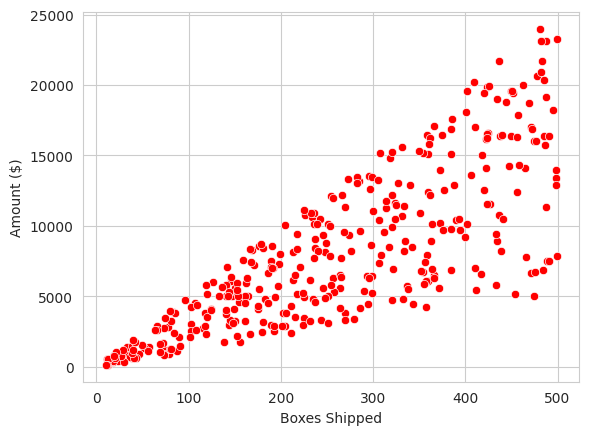

In [68]:
sns.scatterplot(x="Boxes Shipped", y="Amount ($)", data=df, color="red")
plt.show()

In [69]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)

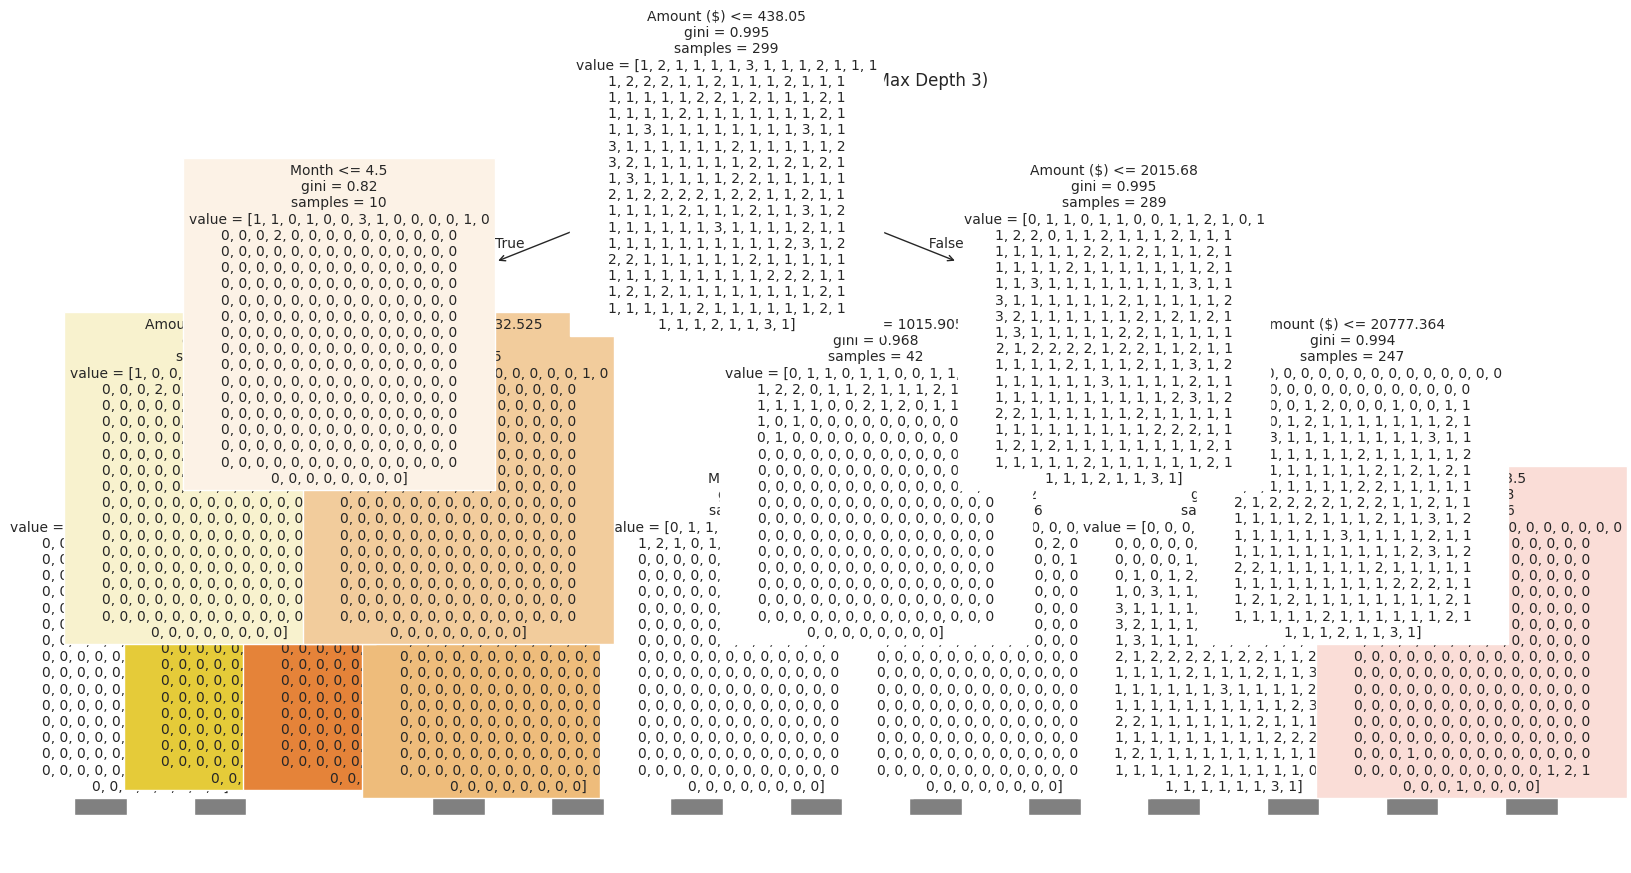

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns.tolist(), filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Max Depth 3)")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve

In [75]:
mse= mean_squared_error(y_test, y_pred_lr)
r2= r2_score(y_test, y_pred_lr)

In [77]:
mse, r2

(5591.028736863263, 0.7155639080168796)

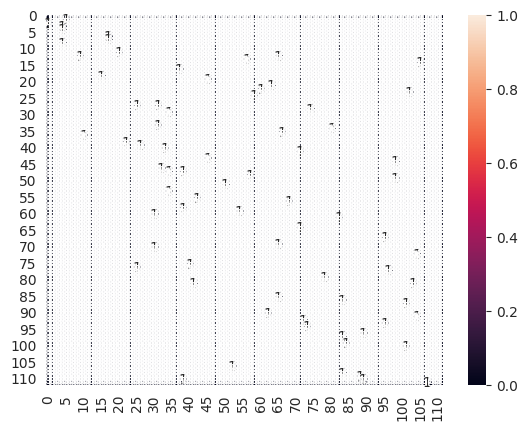

In [78]:
cm= confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [79]:
from sklearn.linear_model import Lasso, Ridge

In [86]:
lasso=Lasso(alpha=100)
lasso.fit(X_train, y_train)
y_pred_lasso=lasso.predict(X_test)

In [87]:
mse_lasso= mean_squared_error(y_test, y_pred_lasso)
r2_lasso= r2_score(y_test, y_pred_lasso)
mse_lasso, r2_lasso

(5483.6495793572885, 0.7210266787088033)

In [88]:
ridge= Ridge()
ridge.fit(X_train, y_train)
ridge_pred=ridge.predict(X_test)
ridge_mse=mean_squared_error(y_test, ridge_pred)
ridge_rmse=np.sqrt(ridge_mse)
print(ridge_rmse)

74.77272021150705


In [89]:
r2_ridge= r2_score(y_test, ridge_pred)
r2_ridge

0.7155674207939695